# Principal Component Analysis with Cancer Data

In [99]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [391]:
data_df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [392]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [393]:
data_df.drop(['ID'],axis=1,inplace=True)

In [394]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [395]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [396]:
data_df.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [397]:
data_df.shape

(699, 10)

In [398]:
data_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [399]:
data_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [400]:
data_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [401]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [402]:
data_df['Bare Nuclei'].replace({'?':0}, inplace=True)

In [403]:
data_df['Bare Nuclei']=data_df['Bare Nuclei'].astype(int)

In [404]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


In [406]:
data_df['Bare Nuclei']=np.where(data_df['Bare Nuclei']==0,data_df['Bare Nuclei'].median(),data_df['Bare Nuclei'])

In [407]:
data_df['Bare Nuclei'].value_counts()

1.0     418
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare Nuclei, dtype: int64

In [408]:
data_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [409]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
data_df.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [410]:
data_df.duplicated().sum()

242

In [411]:
data_df.drop_duplicates(inplace=True)

In [412]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 457 non-null int64
Cell Size                      457 non-null int64
Cell Shape                     457 non-null int64
Marginal Adhesion              457 non-null int64
Single Epithelial Cell Size    457 non-null int64
Bare Nuclei                    457 non-null float64
Normal Nucleoli                457 non-null int64
Bland Chromatin                457 non-null int64
Mitoses                        457 non-null int64
Class                          457 non-null int64
dtypes: float64(1), int64(9)
memory usage: 39.3 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [413]:
# Check for correlation of variable
data_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.572961,0.585051,0.376395,0.424863,0.505154,0.490478,0.444999,0.293701,0.671929
Cell Size,0.572961,1.000000,0.876257,0.636158,0.686596,0.584168,0.710696,0.653571,0.401360,0.754380
Cell Shape,0.585051,0.876257,1.000000,0.608572,0.645747,0.610110,0.685179,0.651476,0.379111,0.755177
Marginal Adhesion,0.376395,0.636158,0.608572,1.000000,0.523539,0.586841,0.608256,0.509574,0.355714,0.618088
Single Epithelial Cell Size,0.424863,0.686596,0.645747,0.523539,1.000000,0.477419,0.550626,0.554593,0.432699,0.600130
Bare Nuclei,0.505154,0.584168,0.610110,0.586841,0.477419,1.000000,0.600113,0.466019,0.263617,0.756300
Normal Nucleoli,0.490478,0.710696,0.685179,0.608256,0.550626,0.600113,1.000000,0.604270,0.276981,0.704781
Bland Chromatin,0.444999,0.653571,0.651476,0.509574,0.554593,0.466019,0.604270,1.000000,0.367106,0.636002
Mitoses,0.293701,0.401360,0.379111,0.355714,0.432699,0.263617,0.276981,0.367106,1.000000,0.357504
Class,0.671929,0.754380,0.755177,0.618088,0.600130,0.756300,0.704781,0.636002,0.357504,1.000000


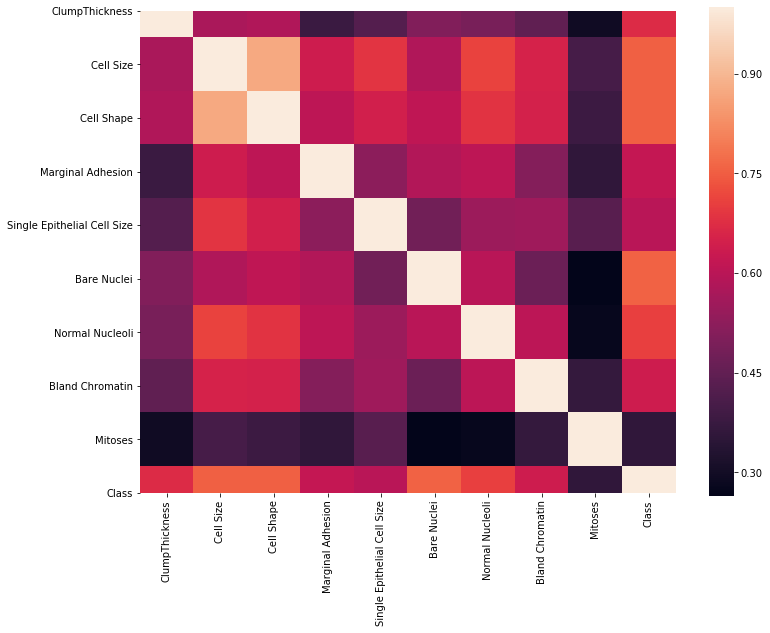

In [414]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data_df.corr(),square=True)

In [415]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [416]:
#Let us check for pair plots

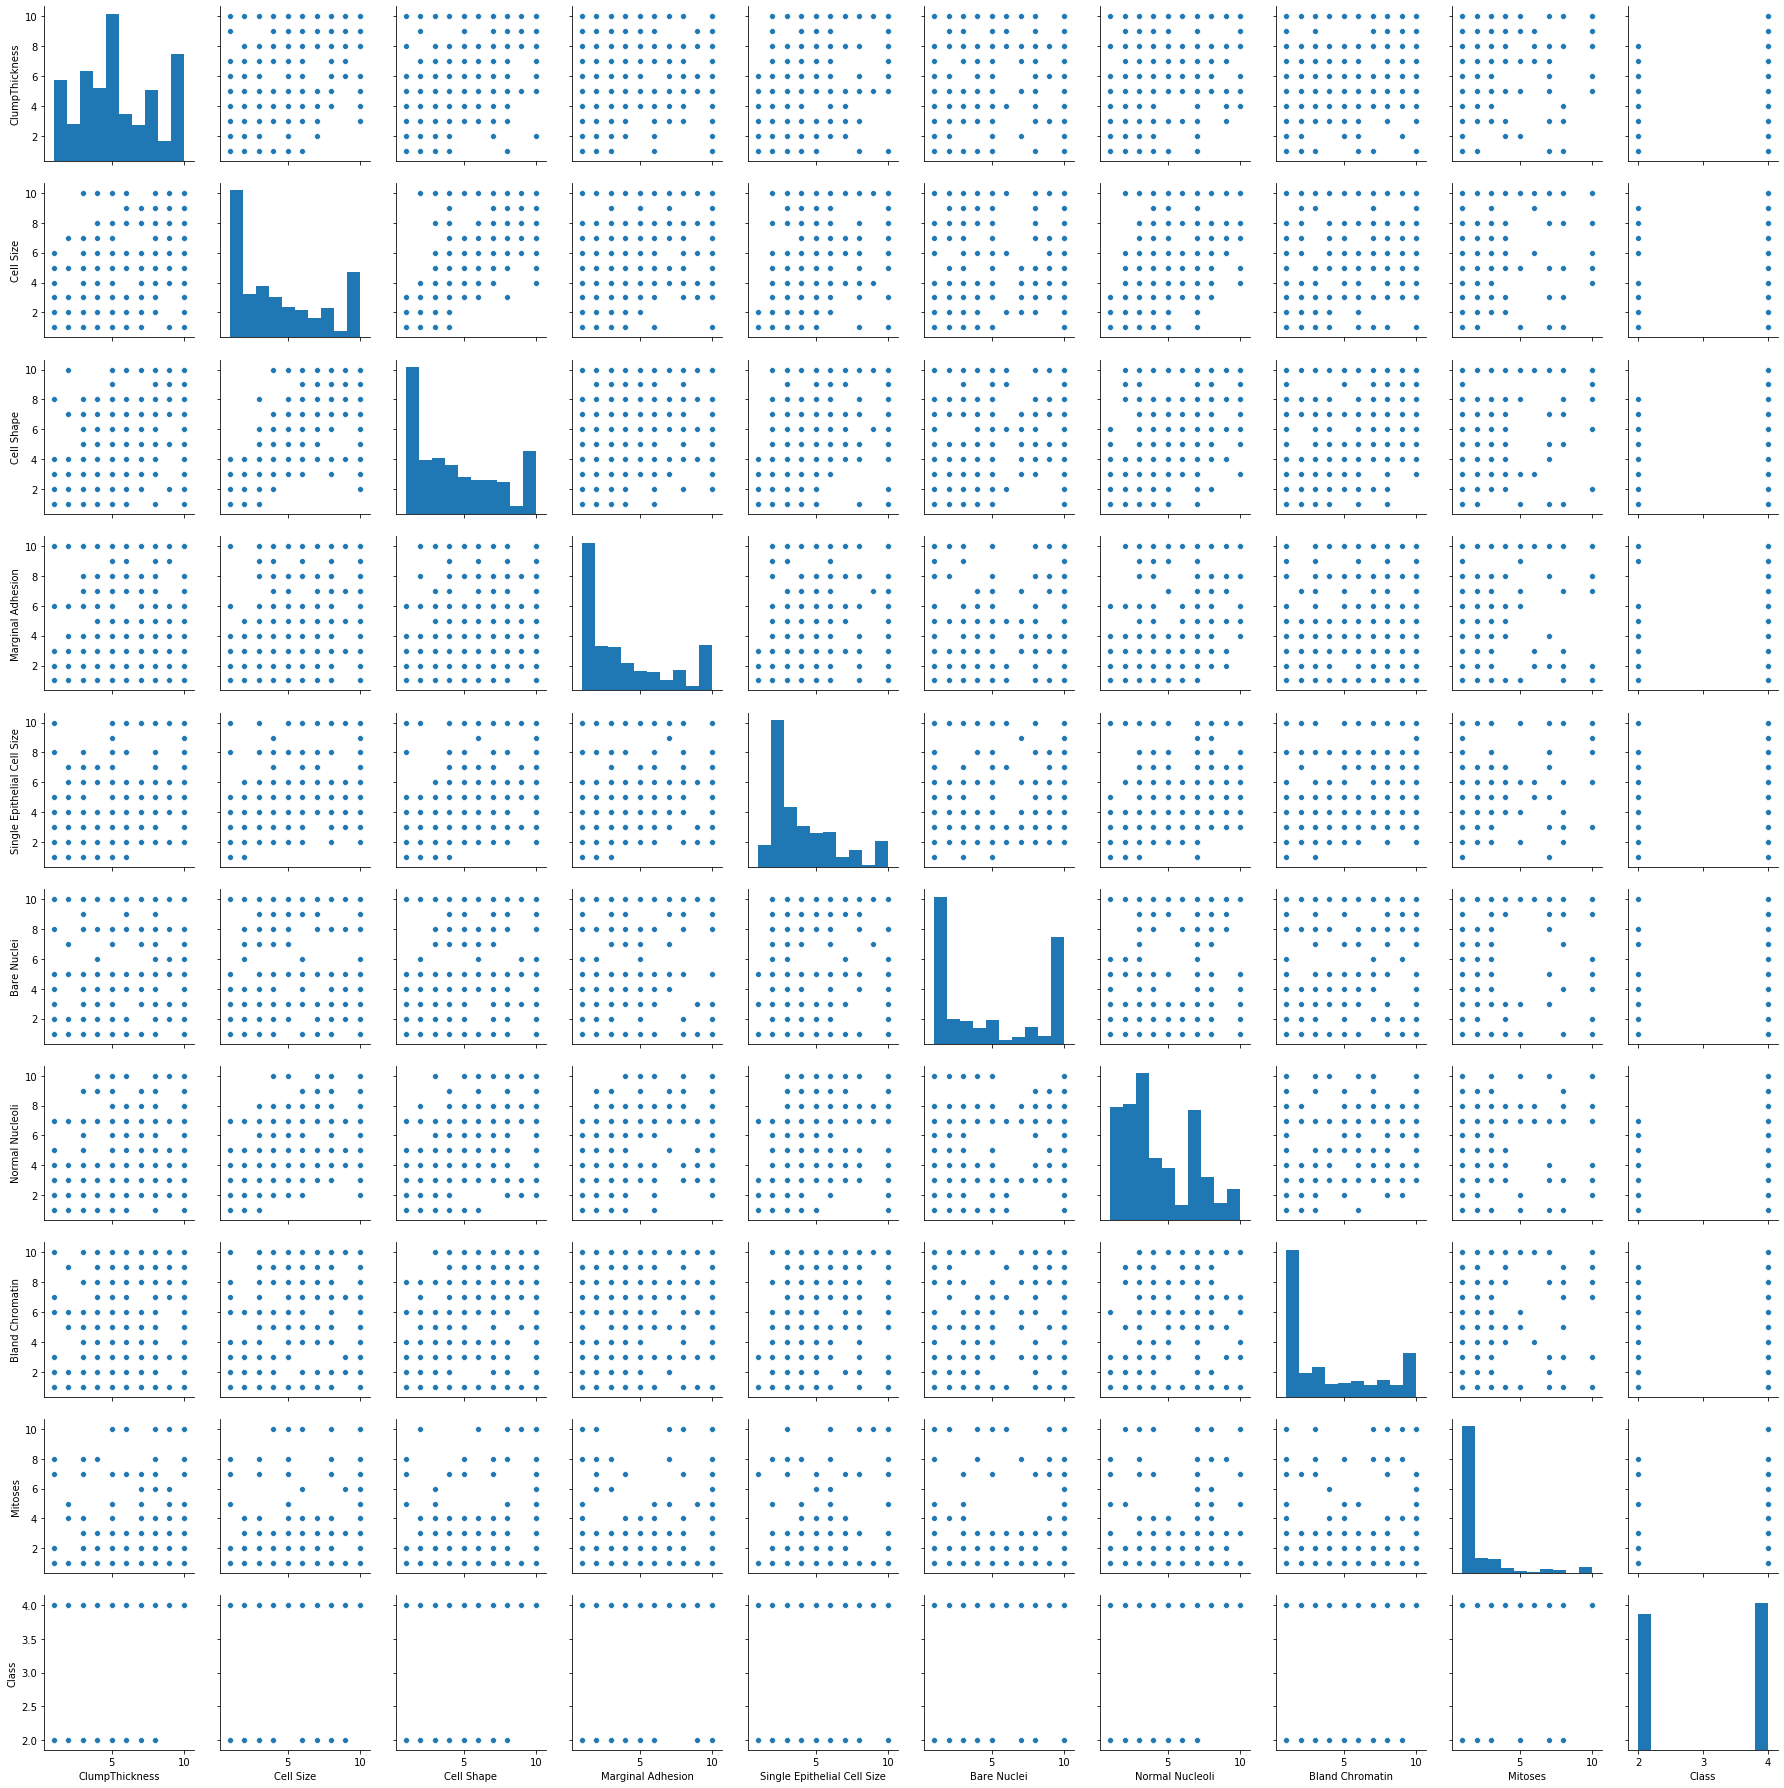

In [417]:
sns.pairplot(data_df)

In [418]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [419]:
# We could see most of the outliers are now removed.

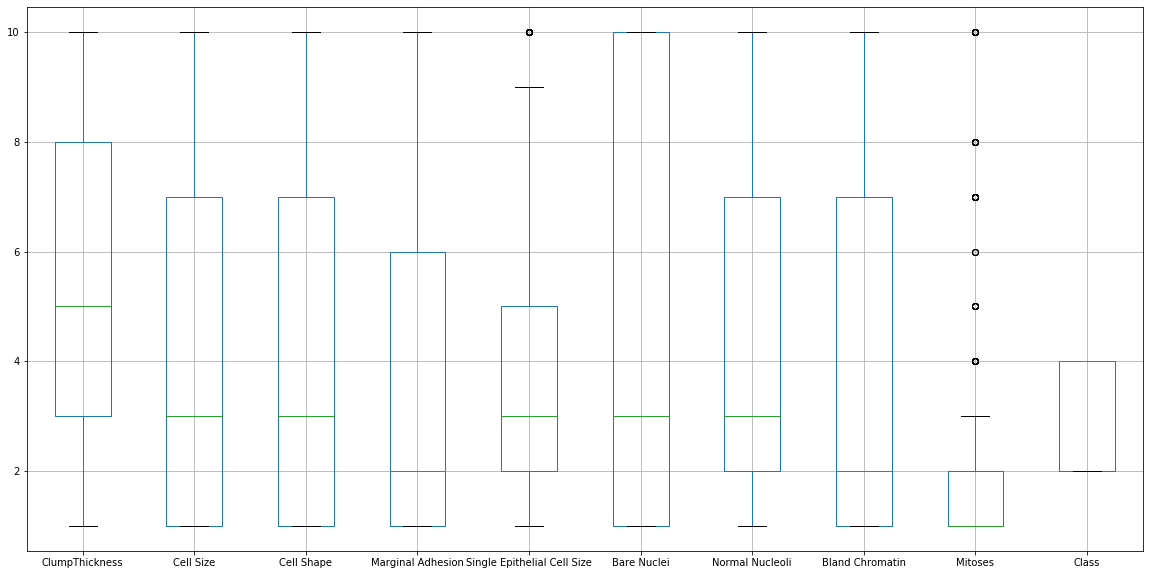

In [420]:
f, ax = plt.subplots(figsize=(20, 10))
data_df.boxplot()

In [421]:
Q1=data_df.quantile(0.25)
Q3=data_df.quantile(0.75)

In [422]:
IQR=Q3-Q1

In [423]:
r1=Q1-1.5 * IQR

In [424]:
r2=Q3+1.5 * IQR

In [425]:
print(r1)

ClumpThickness                 -4.5
Cell Size                      -8.0
Cell Shape                     -8.0
Marginal Adhesion              -6.5
Single Epithelial Cell Size    -2.5
Bare Nuclei                   -12.5
Normal Nucleoli                -5.5
Bland Chromatin                -8.0
Mitoses                        -0.5
Class                          -1.0
dtype: float64


In [426]:
print(r2)

ClumpThickness                 15.5
Cell Size                      16.0
Cell Shape                     16.0
Marginal Adhesion              13.5
Single Epithelial Cell Size     9.5
Bare Nuclei                    23.5
Normal Nucleoli                14.5
Bland Chromatin                16.0
Mitoses                         3.5
Class                           7.0
dtype: float64


In [427]:
((data_df < r1) | (data_df > r2)).sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size    30
Bare Nuclei                     0
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                        52
Class                           0
dtype: int64

In [428]:
#For Epithelil cell lets impute the outliers with median

In [429]:
Epithelial_median=float(data_df["Single Epithelial Cell Size"].median())
data_df["Single Epithelial Cell Size"]=np.where((data_df["Single Epithelial Cell Size"]<r1["Single Epithelial Cell Size"]) | (data_df["Single Epithelial Cell Size"] >r2["Single Epithelial Cell Size"]),Epithelial_median,data_df["Single Epithelial Cell Size"])

In [430]:
((data_df < r1) | (data_df > r2)).sum()

ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                     0
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                        52
Class                           0
dtype: int64

For Mitoses since the mean, median and all are centered around the value 1, to avoid information loss, we try a diffferent strategy to impute the outliers

In [431]:
pd.crosstab(data_df['Mitoses'],data_df['Class'])

Class,2,4
Mitoses,,
1,206,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [432]:
#Beyond 3 we see some similarity in the data so we replace values above 3 to 3 itself to treat outliers

In [433]:
data_df['Mitoses']=np.where(data_df['Mitoses']>3,3,data_df['Mitoses'])

In [434]:
pd.crosstab(data_df['Mitoses'],data_df['Class'])

Class,2,4
Mitoses,,
1,206,132
2,8,27
3,5,79


In [435]:
((data_df < r1) | (data_df > r2)).sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

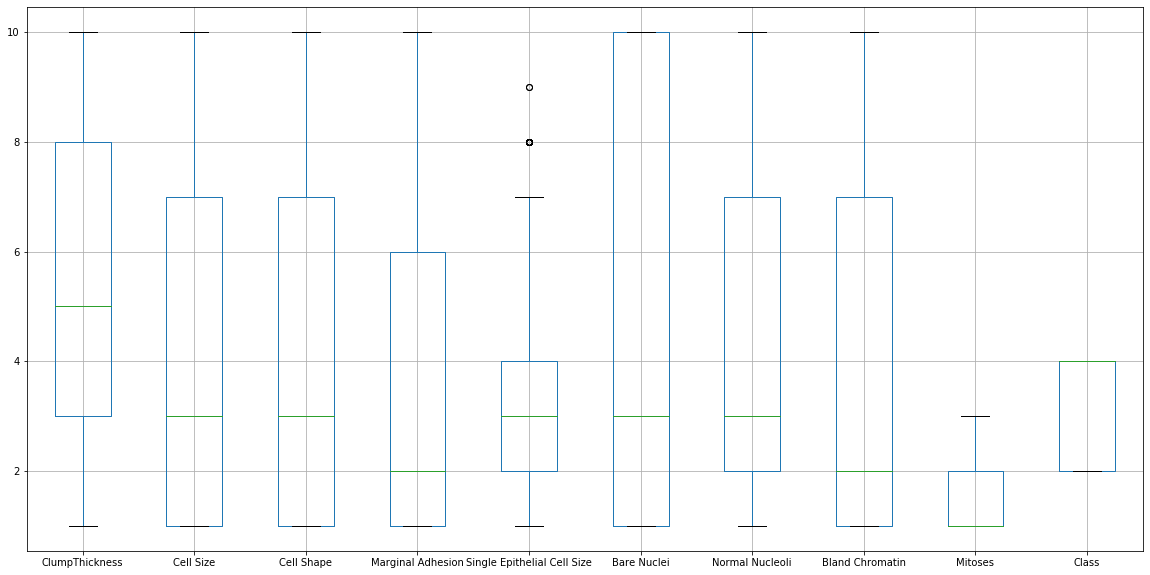

In [436]:
f, ax = plt.subplots(figsize=(20, 10))
data_df.boxplot()

In [437]:
data_df.drop(['Class'],axis=1, inplace=True)

In [438]:
#lets apply standardisation

In [439]:
from scipy.stats import zscore

In [440]:
data_std = data_df.apply(zscore)

In [441]:
data_std.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,-0.128603,-0.993808,-1.050717,-0.864384,-0.769037,-0.965209,-0.453018,-0.838199,-0.566655
1,-0.128603,-0.066930,-0.089079,0.403749,1.959610,1.357731,-0.453018,-0.543086,-0.566655
2,-0.828263,-0.993808,-1.050717,-0.864384,-0.769037,-0.707105,-0.453018,-0.838199,-0.566655
3,0.221227,1.168907,1.193104,-0.864384,-0.223307,-0.190896,-0.453018,0.932480,-0.566655
4,-0.478433,-0.993808,-1.050717,-0.230317,-0.769037,-0.965209,-0.453018,-0.838199,-0.566655


# Q6 Create a covariance matrix for identifying Principal components

In [442]:
# PCA
# Step 1 - Create covariance matrix

In [443]:
#Since PCA expects data in different format, we do transpose of the data in data_std

In [444]:
covariance_matrix = np.cov(data_std.T)

# Q7 Identify eigen values and eigen vector

In [445]:
# Step 2- Get eigen values and eigen vector

In [446]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [447]:
print('eigen_vectors')
print(eigen_vectors)

eigen_vectors
[[-2.93844066e-01 -5.37074065e-03  7.61772313e-02  7.69092428e-01
  -2.87426446e-01 -1.64677724e-01 -1.02787124e-01  4.39136179e-01
   5.64109517e-02]
 [-3.89136837e-01 -7.24517049e-01 -1.02567699e-01  6.00955210e-03
  -1.42434492e-01  2.26415990e-01  1.19687976e-01 -2.90803639e-01
   3.77687129e-01]
 [-3.84920290e-01  6.75017202e-01 -1.41576465e-01  6.61348085e-02
  -1.53838983e-01  1.82469071e-01  2.89245652e-01 -3.47782705e-01
   3.31953592e-01]
 [-3.30761351e-01  4.15639159e-02 -4.89290073e-02 -2.23037095e-01
   5.79215859e-01  1.86653881e-01  1.02038330e-01  6.15645349e-01
   2.77431209e-01]
 [-3.16715407e-01  3.34126757e-02 -3.47835246e-02 -4.69979837e-01
  -2.84894601e-01 -7.05571948e-01 -2.29903613e-01  8.80833400e-02
   1.92023304e-01]
 [-3.27900246e-01 -8.30877604e-02 -9.44214841e-02  2.29828844e-01
   5.21254562e-01 -4.58201271e-01  2.94171579e-01 -3.17848770e-01
  -3.93219604e-01]
 [-3.53971410e-01  8.00368174e-02 -2.87147497e-01 -5.28530510e-05
   1.09401090e

# Q8 Find variance and cumulative variance by each eigen vector

In [448]:
total = sum(eigen_values)

In [449]:
sorted_eigenvalues = sorted(eigen_values,reverse=True)

In [450]:
var_explained = [(value/total)*100 for value in sorted_eigenvalues]

In [451]:
var_explained

[59.0043342149069,
 8.502566185965007,
 7.581458777125631,
 6.736733487045418,
 5.190226501075402,
 4.355641807304967,
 3.8082410212249562,
 3.505999972556929,
 1.3147980327948088]

In [452]:
#to put step plot, we need cumulative variance

In [453]:
cum_var_explained = np.cumsum(var_explained)

In [454]:
cum_var_explained

array([ 59.00433421,  67.5069004 ,  75.08835918,  81.82509267,
        87.01531917,  91.37096097,  95.17920199,  98.68520197,
       100.        ])

In [455]:
#7 PC dimensions it takes to give 100% variance

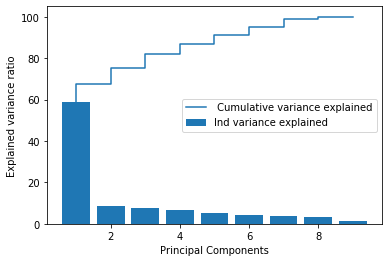

In [456]:
plt.bar(range(1,10),var_explained, align='center',label='Ind variance explained')
plt.step(range(1,10), cum_var_explained,label=' Cumulative variance explained')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [457]:
from sklearn.decomposition import PCA

In [458]:
pca = PCA(n_components=7)

In [459]:
data_with_less_dimensions = pca.fit_transform(data_std)

In [460]:
pca.components_

array([[ 2.93844066e-01,  3.89136837e-01,  3.84920290e-01,
         3.30761351e-01,  3.16715407e-01,  3.27900246e-01,
         3.53971410e-01,  3.37263448e-01,  2.40399403e-01],
       [ 7.61772313e-02, -1.02567699e-01, -1.41576465e-01,
        -4.89290073e-02, -3.47835246e-02, -9.44214841e-02,
        -2.87147497e-01,  2.32466835e-02,  9.31729333e-01],
       [-7.69092428e-01, -6.00955210e-03, -6.61348085e-02,
         2.23037095e-01,  4.69979837e-01, -2.29828844e-01,
         5.28530510e-05,  2.79319222e-01,  5.11838592e-02],
       [ 2.87426446e-01,  1.42434492e-01,  1.53838983e-01,
        -5.79215859e-01,  2.84894601e-01, -5.21254562e-01,
        -1.09401090e-01,  4.03649774e-01, -1.00836591e-01],
       [-1.64677724e-01,  2.26415990e-01,  1.82469071e-01,
         1.86653881e-01, -7.05571948e-01, -4.58201271e-01,
         2.84303061e-01,  2.40184058e-01,  8.47680534e-02],
       [ 5.64109517e-02,  3.77687129e-01,  3.31953592e-01,
         2.77431209e-01,  1.92023304e-01, -3.932196

In [461]:
pca_df=pd.DataFrame(data_with_less_dimensions)

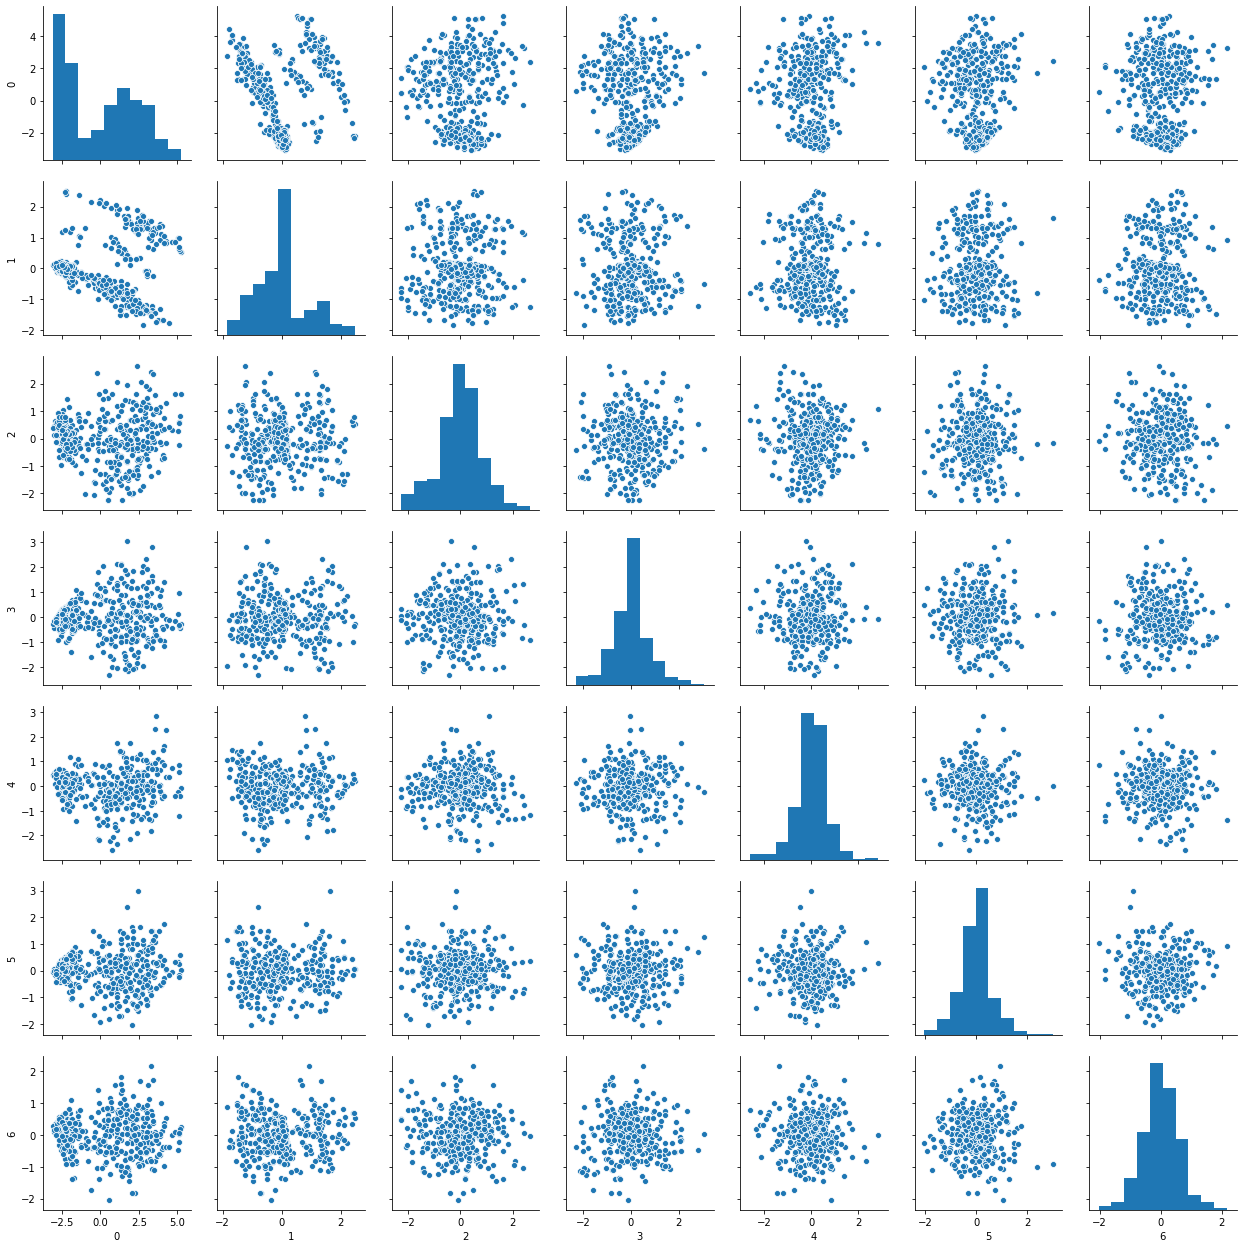

In [462]:
sns.pairplot(pca_df)

# Q10 Find correlation between components and features

In [463]:
#x - principal components, y - variance ratio

In [464]:
data_combined=pd.DataFrame(pca.components_,columns=list(data_std))

In [465]:
data_combined.shape

(7, 9)

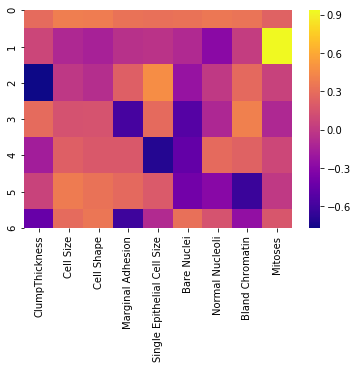

In [466]:
sns.heatmap(data_combined, cmap='plasma')

Inferences:
    - PC0 hs no strong correlation with any columns, which means all the columns have equal contribution
    - PC1 has a strong positive correlation with Mitoses and all other columns have neutral or negative correlation with litte higher negativa correlation with Normal Nucleoli
    - PC2 has strong negative correlation with Clumpthickeness. Single Epithelil cell has some positive correlation
    - PC3 has strong negative correlation Marginal Adhesion, higher negative correlation on Bare Nuclei, negative correlation with Normal Nuclei and Mitoses
    - PC4 has strong negative correlation with Single Epithelial Cell Size, good negative correlation with Bare Nuclei, average negative correlation with Clump thickness
    - PC5 has strong negative correlation with Bland Chromatin and good negative correlation with Bare Nuclei and Normal Nucleoli
    - PC6 has strong negative correlation with Marginal adhesion, good negative correlation with Clump thickness and average negative correlation with Bland Chromatin